📊 AMAZON FINE FOOD REVIEWS ANALYSIS
Total Reviews: 568,454
Total Products: 74,258
Total Users: 256,059
Date Range: 1999-10-08 to 2012-10-26

🏆 TOP 20 MOST REVIEWED PRODUCTS
----------------------------------------
            Avg_Rating  Review_Count  Rating_Std
ProductId                                       
B007JFMH8M        4.58           913        0.71
B0026RQTGE        4.59           632        0.97
B002QWHJOU        4.59           632        0.97
B002QWP89S        4.59           632        0.97
B002QWP8H0        4.59           632        0.97
B003B3OOPA        4.74           623        0.67
B001EO5Q64        4.75           567        0.70
B000VK8AVK        4.31           564        1.15
B0026KNQSA        4.31           564        1.15
B007M83302        4.31           564        1.15

🚀 STARTING PRODUCT ANALYSIS
Analyzing most reviewed product: B007JFMH8M

🔍 DETAILED ANALYSIS: Product B007JFMH8M
Total Reviews: 913
Average Rating: 4.58/5
Rating Std Dev: 0.71

⭐ RATING BREAKDOWN:


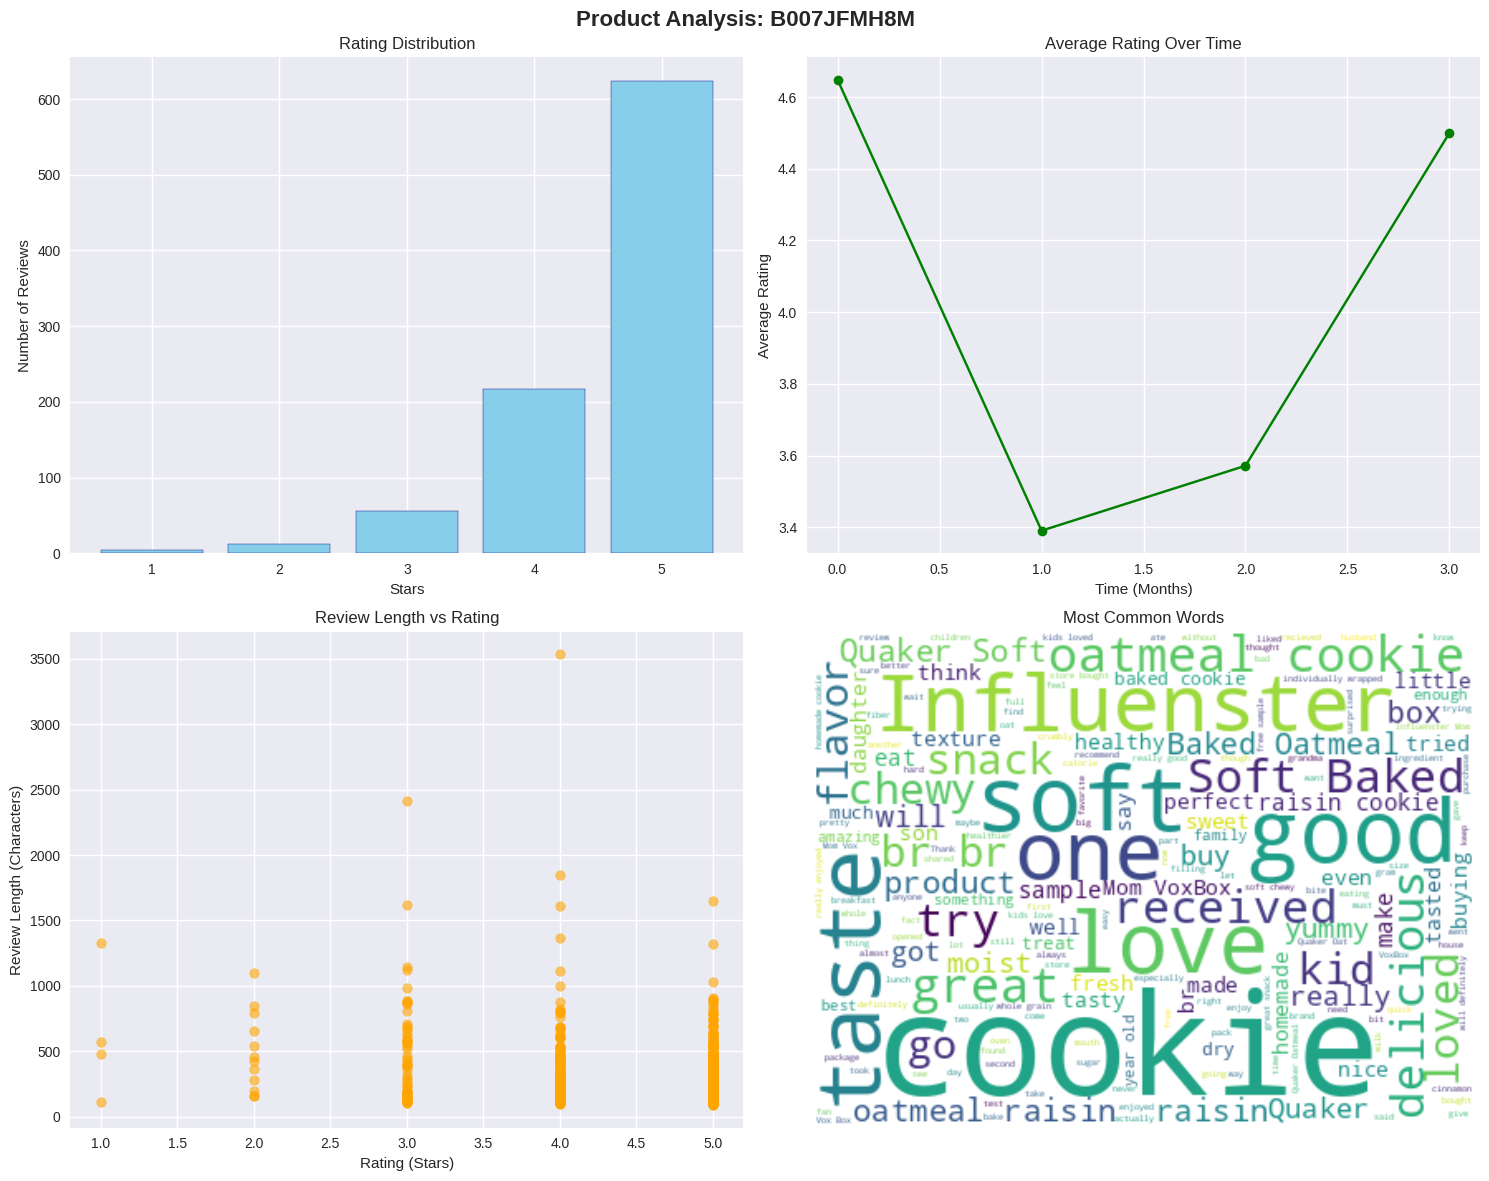


🏅 COMPARING TOP 5 MOST REVIEWED PRODUCTS

🔄 PRODUCT COMPARISON
    ProductId  Total_Reviews  Avg_Rating  Positive_Sentiment_%  Recent_Reviews
0  B007JFMH8M            913        4.58                  92.0             169
1  B0026RQTGE            632        4.59                  66.0             127
2  B002QWHJOU            632        4.59                  66.0             127
3  B002QWP89S            632        4.59                  66.0             127
4  B002QWP8H0            632        4.59                  66.0             127

📊 OVERALL INSIGHTS
Overall Rating Distribution:
1⭐: 52,268 reviews (9.2%)
2⭐: 29,769 reviews (5.2%)
3⭐: 42,640 reviews (7.5%)
4⭐: 80,655 reviews (14.2%)
5⭐: 363,122 reviews (63.9%)

🌟 PRODUCTS WITH HIGHEST AVERAGE RATINGS (min 50 reviews):
            Avg_Rating  Review_Count
ProductId                           
B000ED9L9E        4.97           113
B000O5DI1E        4.91           107
B001E6GFKI        4.89            80
B000CR1ELU        4.88            57

In [2]:
# Amazon Product Review Analysis
# Analyze sentiment and patterns in product reviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Text analysis libraries
from textblob import TextBlob
from wordcloud import WordCloud
import re

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ================================
# 1. LOAD AND EXPLORE DATA
# ================================

# Load the dataset
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

print("📊 AMAZON FINE FOOD REVIEWS ANALYSIS")
print("=" * 50)
print(f"Total Reviews: {len(df):,}")
print(f"Total Products: {df['ProductId'].nunique():,}")
print(f"Total Users: {df['UserId'].nunique():,}")
print(f"Date Range: {pd.to_datetime(df['Time'], unit='s').min().date()} to {pd.to_datetime(df['Time'], unit='s').max().date()}")

# ================================
# 2. PRODUCT POPULARITY ANALYSIS
# ================================

print("\n🏆 TOP 20 MOST REVIEWED PRODUCTS")
print("-" * 40)

# Get top reviewed products
top_products = df['ProductId'].value_counts().head(20)
product_info = df.groupby('ProductId').agg({
    'Score': ['mean', 'count', 'std'],
    'Text': lambda x: x.iloc[0][:100] + '...' if len(x.iloc[0]) > 100 else x.iloc[0]
}).round(2)

product_info.columns = ['Avg_Rating', 'Review_Count', 'Rating_Std', 'Sample_Review']

# Display top products
top_product_details = product_info.loc[top_products.index].head(10)
print(top_product_details[['Avg_Rating', 'Review_Count', 'Rating_Std']])

# ================================
# 3. SENTIMENT ANALYSIS FUNCTIONS
# ================================

def analyze_sentiment(text):
    """Analyze sentiment using TextBlob"""
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    if polarity > 0.1:
        sentiment = 'Positive'
    elif polarity < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return sentiment, polarity, subjectivity

def extract_keywords(text_series, num_words=20):
    """Extract most common keywords from text"""
    all_text = ' '.join(text_series.astype(str))
    # Remove common words and clean text
    all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())
    words = all_text.split()
    
    # Remove common stop words
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'should', 'could', 'can', 'may', 'might', 'must', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'my', 'your', 'his', 'her', 'its', 'our', 'their'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    return Counter(words).most_common(num_words)

# ================================
# 4. ANALYZE SPECIFIC PRODUCT
# ================================

def analyze_product_reviews(product_id, df):
    """Comprehensive analysis of a specific product's reviews"""
    
    product_reviews = df[df['ProductId'] == product_id].copy()
    
    if len(product_reviews) == 0:
        print(f"No reviews found for product {product_id}")
        return
    
    print(f"\n🔍 DETAILED ANALYSIS: Product {product_id}")
    print("=" * 60)
    
    # Basic stats
    total_reviews = len(product_reviews)
    avg_rating = product_reviews['Score'].mean()
    rating_std = product_reviews['Score'].std()
    
    print(f"Total Reviews: {total_reviews}")
    print(f"Average Rating: {avg_rating:.2f}/5")
    print(f"Rating Std Dev: {rating_std:.2f}")
    
    # Rating distribution
    print(f"\n⭐ RATING BREAKDOWN:")
    rating_counts = product_reviews['Score'].value_counts().sort_index()
    for rating, count in rating_counts.items():
        percentage = (count / total_reviews) * 100
        print(f"{rating}⭐: {count:3d} reviews ({percentage:5.1f}%)")
    
    # Sentiment analysis
    print(f"\n💭 SENTIMENT ANALYSIS:")
    sentiments = []
    polarities = []
    
    for text in product_reviews['Text'].head(100):  # Analyze first 100 for speed
        sentiment, polarity, _ = analyze_sentiment(text)
        sentiments.append(sentiment)
        polarities.append(polarity)
    
    sentiment_counts = Counter(sentiments)
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(sentiments)) * 100
        print(f"{sentiment}: {count} ({percentage:.1f}%)")
    
    # Keywords analysis
    print(f"\n🔑 COMMON KEYWORDS:")
    
    # Positive reviews keywords (4-5 stars)
    positive_reviews = product_reviews[product_reviews['Score'] >= 4]['Text']
    if len(positive_reviews) > 0:
        pos_keywords = extract_keywords(positive_reviews, 10)
        print("Positive Reviews Keywords:", [word for word, count in pos_keywords])
    
    # Negative reviews keywords (1-2 stars)
    negative_reviews = product_reviews[product_reviews['Score'] <= 2]['Text']
    if len(negative_reviews) > 0:
        neg_keywords = extract_keywords(negative_reviews, 10)
        print("Negative Reviews Keywords:", [word for word, count in neg_keywords])
    
    # Time trend
    print(f"\n📅 REVIEW TRENDS:")
    product_reviews['Date'] = pd.to_datetime(product_reviews['Time'], unit='s')
    monthly_reviews = product_reviews.groupby(product_reviews['Date'].dt.to_period('M')).agg({
        'Score': ['count', 'mean']
    }).round(2)
    monthly_reviews.columns = ['Review_Count', 'Avg_Rating']
    
    print("Recent months review activity:")
    print(monthly_reviews.tail())
    
    # Sample reviews
    print(f"\n📝 SAMPLE REVIEWS:")
    print("\n🌟 BEST REVIEWS (5 stars):")
    best_reviews = product_reviews[product_reviews['Score'] == 5]['Text'].head(3)
    for i, review in enumerate(best_reviews, 1):
        print(f"{i}. {review[:200]}...")
    
    print(f"\n💔 WORST REVIEWS (1-2 stars):")
    worst_reviews = product_reviews[product_reviews['Score'] <= 2]['Text'].head(3)
    for i, review in enumerate(worst_reviews, 1):
        print(f"{i}. {review[:200]}...")
    
    return product_reviews

# ================================
# 5. VISUALIZATIONS
# ================================

def create_product_visualizations(product_reviews, product_id):
    """Create visualizations for product analysis"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Product Analysis: {product_id}', fontsize=16, fontweight='bold')
    
    # Rating distribution
    axes[0,0].bar(product_reviews['Score'].value_counts().sort_index().index, 
                  product_reviews['Score'].value_counts().sort_index().values, 
                  color='skyblue', edgecolor='navy')
    axes[0,0].set_title('Rating Distribution')
    axes[0,0].set_xlabel('Stars')
    axes[0,0].set_ylabel('Number of Reviews')
    
    # Rating over time
    product_reviews['Date'] = pd.to_datetime(product_reviews['Time'], unit='s')
    monthly_avg = product_reviews.groupby(product_reviews['Date'].dt.to_period('M'))['Score'].mean()
    axes[0,1].plot(range(len(monthly_avg)), monthly_avg.values, marker='o', color='green')
    axes[0,1].set_title('Average Rating Over Time')
    axes[0,1].set_ylabel('Average Rating')
    axes[0,1].set_xlabel('Time (Months)')
    
    # Review length vs rating
    product_reviews['review_length'] = product_reviews['Text'].str.len()
    axes[1,0].scatter(product_reviews['Score'], product_reviews['review_length'], alpha=0.6, color='orange')
    axes[1,0].set_title('Review Length vs Rating')
    axes[1,0].set_xlabel('Rating (Stars)')
    axes[1,0].set_ylabel('Review Length (Characters)')
    
    # Word cloud for all reviews
    all_text = ' '.join(product_reviews['Text'].astype(str))
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(all_text)
    axes[1,1].imshow(wordcloud, interpolation='bilinear')
    axes[1,1].set_title('Most Common Words')
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()

# ================================
# 6. COMPARATIVE ANALYSIS
# ================================

def compare_products(product_ids, df):
    """Compare multiple products"""
    
    print(f"\n🔄 PRODUCT COMPARISON")
    print("=" * 50)
    
    comparison_data = []
    
    for product_id in product_ids:
        product_reviews = df[df['ProductId'] == product_id]
        
        if len(product_reviews) > 0:
            # Calculate sentiment for sample
            sample_reviews = product_reviews['Text'].head(50)
            sentiments = [analyze_sentiment(text)[0] for text in sample_reviews]
            positive_pct = (Counter(sentiments)['Positive'] / len(sentiments)) * 100
            
            comparison_data.append({
                'ProductId': product_id,
                'Total_Reviews': len(product_reviews),
                'Avg_Rating': product_reviews['Score'].mean(),
                'Positive_Sentiment_%': positive_pct,
                'Recent_Reviews': len(product_reviews[product_reviews['Time'] > product_reviews['Time'].quantile(0.8)])
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.round(2))
    
    return comparison_df

# ================================
# 7. MAIN ANALYSIS EXECUTION
# ================================

print(f"\n🚀 STARTING PRODUCT ANALYSIS")
print("=" * 50)

# Get the most reviewed product for detailed analysis
most_reviewed_product = df['ProductId'].value_counts().index[0]
print(f"Analyzing most reviewed product: {most_reviewed_product}")

# Perform detailed analysis
product_data = analyze_product_reviews(most_reviewed_product, df)

# Create visualizations
if product_data is not None and len(product_data) > 0:
    create_product_visualizations(product_data, most_reviewed_product)

# Compare top 5 products
print(f"\n🏅 COMPARING TOP 5 MOST REVIEWED PRODUCTS")
top_5_products = df['ProductId'].value_counts().head(5).index.tolist()
comparison_results = compare_products(top_5_products, df)

# ================================
# 8. CATEGORY INSIGHTS
# ================================

print(f"\n📊 OVERALL INSIGHTS")
print("=" * 40)

# Overall sentiment distribution
print("Overall Rating Distribution:")
overall_ratings = df['Score'].value_counts().sort_index()
for rating, count in overall_ratings.items():
    percentage = (count / len(df)) * 100
    print(f"{rating}⭐: {count:,} reviews ({percentage:.1f}%)")

# Products with most positive sentiment
print(f"\n🌟 PRODUCTS WITH HIGHEST AVERAGE RATINGS (min 50 reviews):")
high_rated = df.groupby('ProductId').agg({
    'Score': ['mean', 'count']
}).round(2)
high_rated.columns = ['Avg_Rating', 'Review_Count']
high_rated_filtered = high_rated[high_rated['Review_Count'] >= 50].sort_values('Avg_Rating', ascending=False)
print(high_rated_filtered.head(10))

print(f"\n📈 ANALYSIS COMPLETE!")
print("You can now:")
print("- Analyze any specific product by calling: analyze_product_reviews('PRODUCT_ID', df)")
print("- Compare products by calling: compare_products(['PRODUCT_ID_1', 'PRODUCT_ID_2'], df)")
print("- Create visualizations by calling: create_product_visualizations(product_data, 'PRODUCT_ID')")

# ================================
# 9. INTERACTIVE ANALYSIS FUNCTION
# ================================

def quick_product_analysis(product_id):
    """Quick analysis function for any product"""
    product_reviews = df[df['ProductId'] == product_id]
    
    if len(product_reviews) == 0:
        return f"❌ Product {product_id} not found!"
    
    total_reviews = len(product_reviews)
    avg_rating = product_reviews['Score'].mean()
    
    # Quick sentiment analysis
    sample_reviews = product_reviews['Text'].head(20)
    sentiments = [analyze_sentiment(text)[0] for text in sample_reviews]
    sentiment_dist = Counter(sentiments)
    
    result = f"""
    🔍 QUICK ANALYSIS: {product_id}
    📊 Total Reviews: {total_reviews}
    ⭐ Average Rating: {avg_rating:.2f}/5
    💭 Sentiment (sample): {dict(sentiment_dist)}
    📅 Latest Review: {pd.to_datetime(product_reviews['Time'].max(), unit='s').date()}
    """
    
    return result

# Example usage
print(f"\n💡 EXAMPLE: Quick analysis of a random product")
random_product = df['ProductId'].sample(1).iloc[0]
print(quick_product_analysis(random_product))